# 1주차 - 머신러닝 과정 이해하기

## 학습 목표

- 머신러닝 모델을 실행하는 기본 과정을 이해하기 (학습 => 예측 => 평가)
- 학습(fit)과 예측(predict)을 하고 평가를 하는 방법
- 
머신러닝 알고리즘 중에 좋은 성능을 내는 boosting 알고리즘의 기본이 되는 DecisionTree 를 사
- 
DecisionTree 의 기본적인 원리 이해하기

## 데이터셋

- 통신사 고객 이탈 정보 : Kaggle 데이터셋( https://www.kaggle.com/blastchar/telco-customer-churn )
- 구성 : 고객 인구 통계 정보, 고객 이탈, 서비스 가입 정보, 고객 계정 정보 등등

## 이번 학습을 적용시킬 수 있는 현실 문제

- 이탈 예측 모델링, 고객 세분화, 원인 분석, 추천 시스템 개선, 고객 유지 전략 개발 등등

## 실습

In [2]:
# 필요한 라이브러리를 로드
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# 데이터 로드
df = pd.read_csv("https://bit.ly/telco-csv", index_col="customerID")
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [13]:
# 숫자형태의 문자열을 숫자형으로 전환
df["TotalCharges"] = df["TotalCharges"].str.strip().replace("", np.nan).astype(float)

In [14]:
# 결측치 제거(결측치를 채우는 방법도 존재한다)
df = df.dropna()
df.isnull().sum().sum()

0

In [15]:
# 바이너리 변수 인코딩을 위해 범주 값이 2개로 되어 있는 이진값으로 인코딩이 가능한 변수 탐색
nuniq = df.nunique()
bi_cols = nuniq[nuniq == 2].index
bi_cols

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'Churn'],
      dtype='object')

In [16]:
# 바이너리 변수에 대한 인코딩
df["gender_encode"] = (df["gender"] == "Male").astype(int)
df["Partner_encode"] = (df["Partner"] == "Yes").astype(int)
df["Dependents_encode"] = (df["Dependents"] == "Yes").astype(int)
df["PhoneService_encode"] = (df["PhoneService"] == "Yes").astype(int)
df["PaperlessBilling_encode"] = (df["PaperlessBilling"] == "Yes").astype(int)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_encode,Partner_encode,Dependents_encode,PhoneService_encode,PaperlessBilling_encode
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Yes,Electronic check,29.85,29.85,No,0,1,0,0,1
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,Mailed check,56.95,1889.50,No,1,0,0,1,0
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Yes,Mailed check,53.85,108.15,Yes,1,0,0,1,1
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,Bank transfer (automatic),42.30,1840.75,No,1,0,0,0,0
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Yes,Electronic check,70.70,151.65,Yes,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Mailed check,84.80,1990.50,No,1,1,1,1,1
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,Credit card (automatic),103.20,7362.90,No,0,1,1,1,1
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,Yes,Electronic check,29.60,346.45,No,0,1,1,0,1


## 미션1. 훈련데이터와 평가데이터 나누기

In [18]:
# 학습 예측에 사용할 열 추출
feature_names = df.select_dtypes(include="number").columns
feature_names

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_encode', 'Partner_encode', 'Dependents_encode',
       'PhoneService_encode', 'PaperlessBilling_encode'],
      dtype='object')

In [19]:
X = df[feature_names]
y = df[["Churn"]]
display(X.head(2))
display(y.head(2))
X.shape, y.shape

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_encode,Partner_encode,Dependents_encode,PhoneService_encode,PaperlessBilling_encode
customerID,,,,,,,,,
7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1
5575-GNVDE,0,34,56.95,1889.50,1,0,0,1,0


,Churn
customerID,
7590-VHVEG,No
5575-GNVDE,No


((7032, 9), (7032, 1))

In [20]:
# train 과 test 로 나누기 위해 데이터를 80:20으로 나눔
split_count = int(df.shape[0] * 0.8)
split_count

5625

In [22]:
# 데이터의 80:20으로 데이터(X)를 train, test로 나눔
# 데이터의 80:20으로 정답 데이터(y)를 train, test로 나눔
X_train = X.iloc[:split_count]
y_train = y.iloc[:split_count]

X_test = X.iloc[split_count:]
y_test = y.iloc[split_count:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5625, 9), (1407, 9), (5625, 1), (1407, 1))

## 미션2. 머신러닝 알고리즘 모델로 학습과 예측하기!

In [24]:
# 모델 학습
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion="entropy",
                               max_depth=6,
                               max_features=0.9,
                               random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=0.9,
                       random_state=42)

In [25]:
y_predict = model.predict(X_test)
y_predict[:5]

array(['No', 'No', 'No', 'No', 'No'], dtype=object)

## 미션3. 점수 측정하고 피처의 중요도 시각화

[Text(0.5, 0.9, 'tenure <= 19.5\nentropy = 0.834\nsamples = 5625\nvalue = [4137, 1488]\nclass = No'),
 Text(0.25, 0.7, 'MonthlyCharges <= 68.425\nentropy = 0.989\nsamples = 2242\nvalue = [1258, 984]\nclass = No'),
 Text(0.125, 0.5, 'tenure <= 3.5\nentropy = 0.854\nsamples = 1223\nvalue = [882, 341]\nclass = No'),
 Text(0.0625, 0.3, 'MonthlyCharges <= 20.875\nentropy = 0.985\nsamples = 487\nvalue = [279, 208]\nclass = No'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'MonthlyCharges <= 27.425\nentropy = 0.682\nsamples = 736\nvalue = [603, 133]\nclass = No'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'TotalCharges <= 120.0\nentropy = 0.95\nsamples = 1019\nvalue = [376, 643]\nclass = Yes'),
 Text(0.3125, 0.3, 'TotalCharges <= 69.875\nentropy = 0.672\nsamples = 187\nvalue = [33, 154]\nclass = Yes'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 

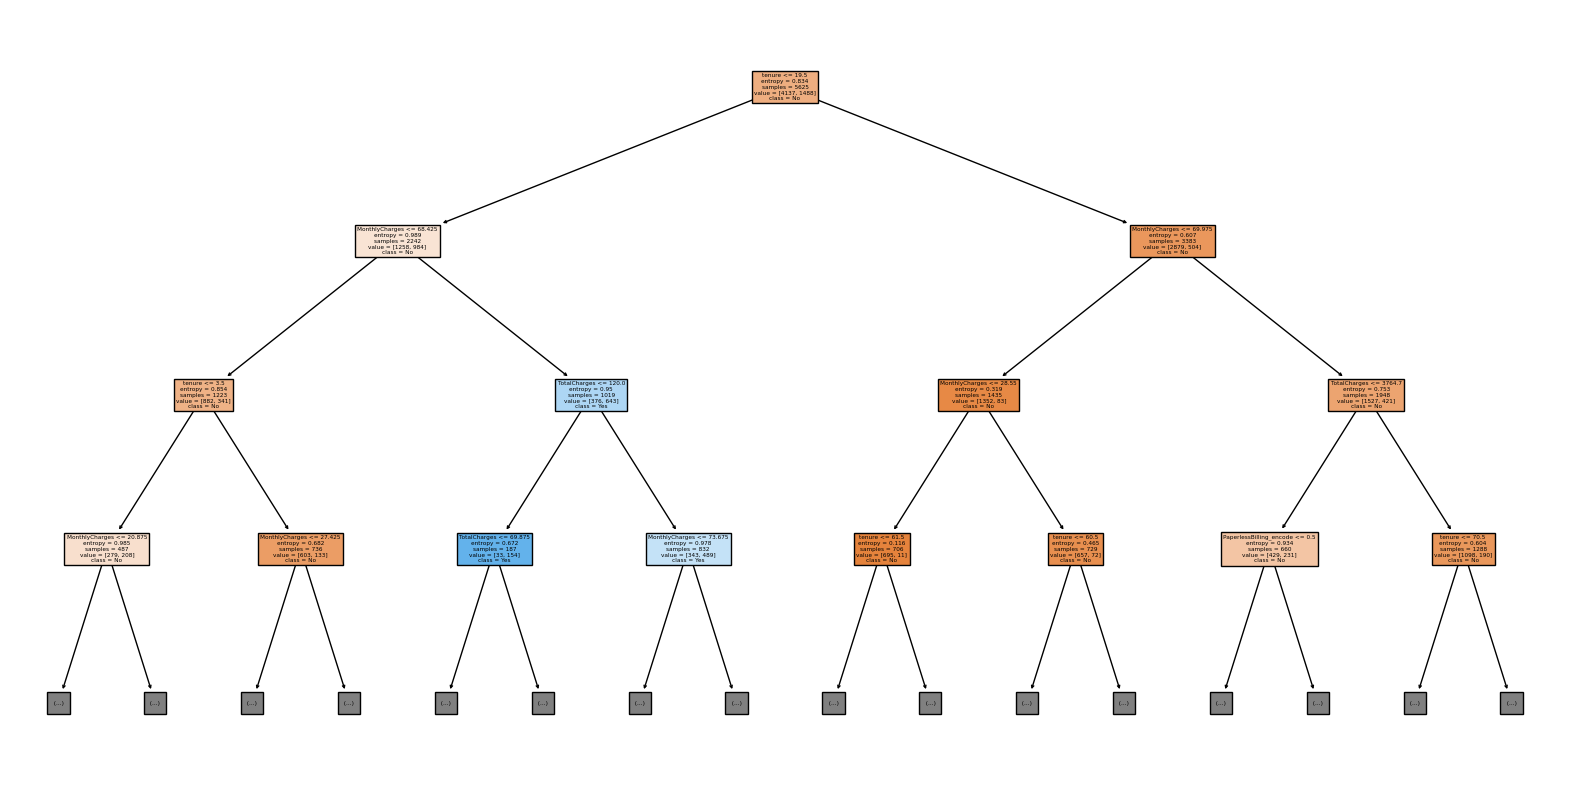

In [26]:
# 네트워크 시각화
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X_train.columns, class_names=['No','Yes'], max_depth=3)

/tmp/ipykernel_9474/2619136544.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model.feature_importances_, y=feature_names,palette='viridis')


<Axes: ylabel='None'>

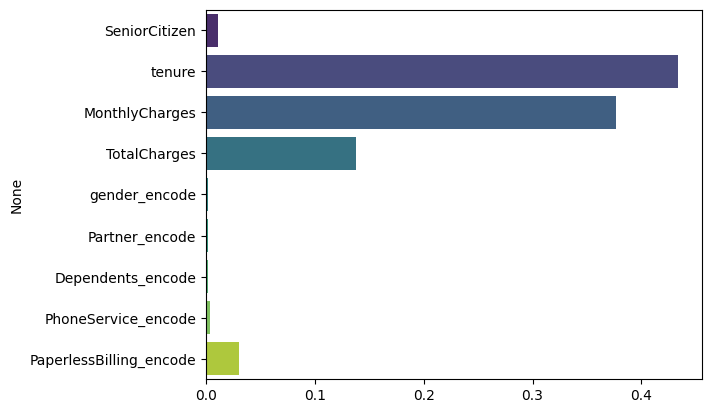

In [30]:
# 피처의 중요도 시각화
sns.barplot(x=model.feature_importances_, y=feature_names,palette='viridis')

In [31]:
# 예측과 실제 정답으로 정확도 확인
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.7896233120113717